# Assignment 1 - Data Cleaning And Feature Selection

Name: Deepthi Nasika

NUID: 002474582

# Abstract


The goal is to perform comprehensive data cleaning, visualizing data, and feature selection to determine independent variables for predicting target variable i.e., Shipping Cost. Key tasks include identifying missing data, analyzing distributions of numerical data, evaluating feature importance using multiple methods, handling outliers, imputing missing values using various methods, calculating error, bias, and variance after imputations.

# MIT LICENSE

MIT License

Copyright (c) 2024 Deepthi-Nasika

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Dataset

The dataset contains information about a global superstore which include various attributes related to sales transactions, customer orders, and shipping details. The dataset contains both numeric and categorical variables.

Here is the description of columns present in the dataset:


1.   category: The category of products sold in the superstore.
2.   city: The city where the order was placed.
1.   country: The country in which the superstore is located.
2.   customer_id: A unique identifier for each customer.
1.   customer_name: The name of the customer who placed the order.
1.   discount: The discount applied to the order.
1.   market: The market or region where the superstore operates.
1.   order_date: The date when the order was placed.
1.   order_id: A unique identifier for each order.
2.   order_priority: The priority level of the order.
2.   product_id: A unique identifier for each product.
2.   product_name: The name of the product.
2.   profit: The profit generated from the order.
2.   quantity: The quantity of products ordered.
1.   region: The region where the order was placed.
1.   row_id: A unique identifier for each row in the dataset.
1.   sales: The total sales amount for the order.
2.   segment: The customer segment (e.g., consumer, corporate, or home office).
2.   ship_date: The date when the order was shipped.
2.   ship_mode: The shipping mode used for the order.
1.   shipping_cost: The cost of shipping for the order.
2.   state: The state or region within the country.
1.   sub_category: The sub-category of products within the main category.
2.   year: The year in which the order was placed.
1.   market2: Another column related to market information.
2.   weeknum: The week number when the order was placed.










# Installing Dependencies

In [53]:
!pip install eli5

# Importing required libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

# Reading Dataset

In [55]:
# Reading the ablone dataset
url = "https://raw.githubusercontent.com/Deepthi-Nasika/DSEMT_Assignments/main/Data/dataset_superstore.csv"

data = pd.read_csv(url)
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,07-01-2011 00:00,CA-2011-130813,High,...,19,Consumer,09-01-2011 00:00,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,21-01-2011 00:00,CA-2011-148614,Medium,...,19,Consumer,26-01-2011 00:00,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,05-08-2011 00:00,CA-2011-118962,Medium,...,21,Consumer,09-08-2011 00:00,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,05-08-2011 00:00,CA-2011-118962,Medium,...,111,Consumer,09-08-2011 00:00,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,29-09-2011 00:00,CA-2011-146969,High,...,6,Consumer,03-10-2011 00:00,Standard Class,1.32,California,Paper,2011,North America,40


# Question 1: What are the data types? (Numerical and Categorical)

Answer:

The dataset contains 26 columns.
Numerical columns = 8
Categorical columns = 18



Numerical Columns :  ['Discount', 'Profit', 'Quantity', 'Row.ID', 'Sales', 'Shipping.Cost', 'Year', 'weeknum']

Categorical Columns :  ['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Region', 'Segment', 'Ship.Date', 'Ship.Mode', 'State', 'Sub.Category', 'Market2']

In [4]:
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("\n")
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Region', 'Segment', 'Ship.Date', 'Ship.Mode', 'State', 'Sub.Category', 'Market2']


Numerical Columns :  ['Discount', 'Profit', 'Quantity', 'Row.ID', 'Sales', 'Shipping.Cost', 'Year', 'weeknum']


# Question 2: Are there missing values?

Answer: The dataset contains no missing values. Hence, the data is clean and no imputation methods are required.

In [5]:
data.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

# Question 3: What are the likely distributions of the numeric variables?

Answer:

***Histogram plot for the Numeric Variables***

Plotting the histogram over the numeric variables shows the normal distribution of data.

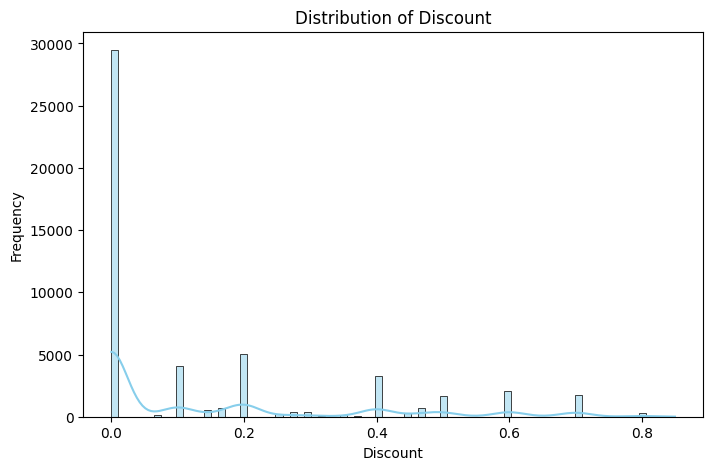

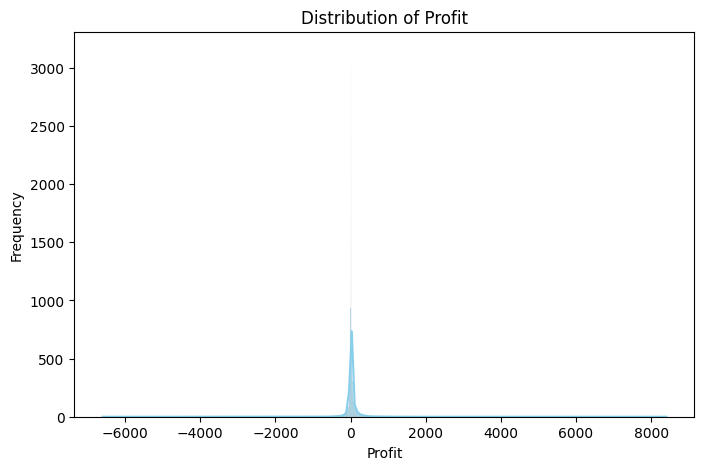

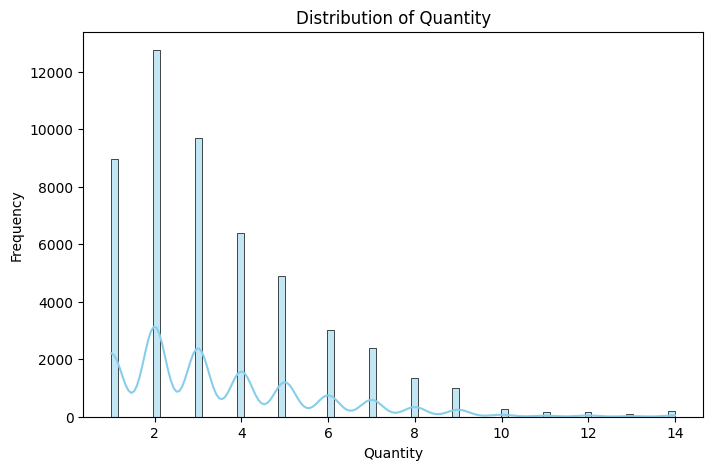

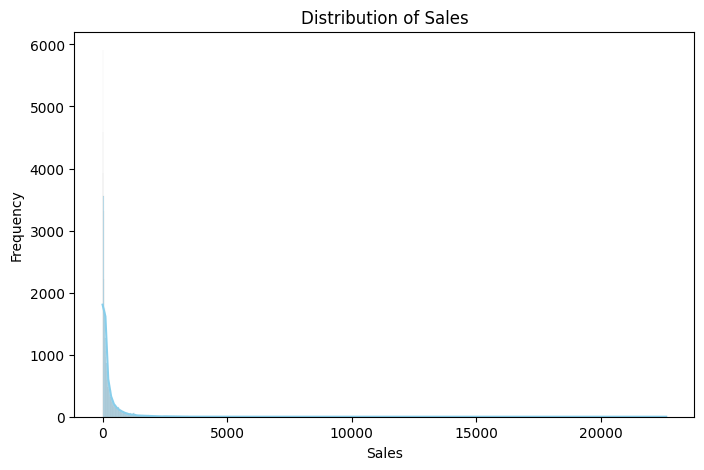

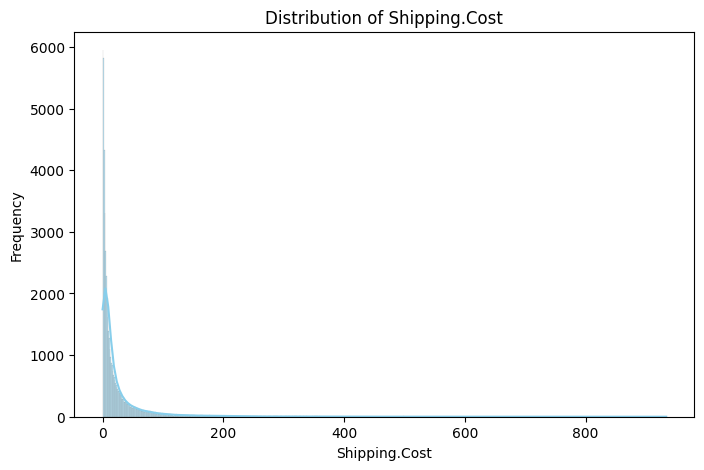

In [7]:
# Select numeric columns
numeric_columns = data[
    ["Discount", "Profit", "Quantity", "Sales", "Shipping.Cost"]
]

# Visualize distributions of numeric variables
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Question 4: Which independent variables are useful to predict a target variable? (Use at least three methods)

Answer: The three methods to plot relationship between target and independent variables are Correlation Analysis, Random Forest Classifier Feature Importance, and Recursive Feature Elimination.

***Method 1: Correlation Analysis***


 It helps in feature selection by identifying independent variables that have a significant correlation with the target variable. Variables with higher correlation coefficients are more likely to be important predictors of the target variable and can be selected for inclusion in the predictive model.

<ipython-input-8-6ec0dfc221eb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


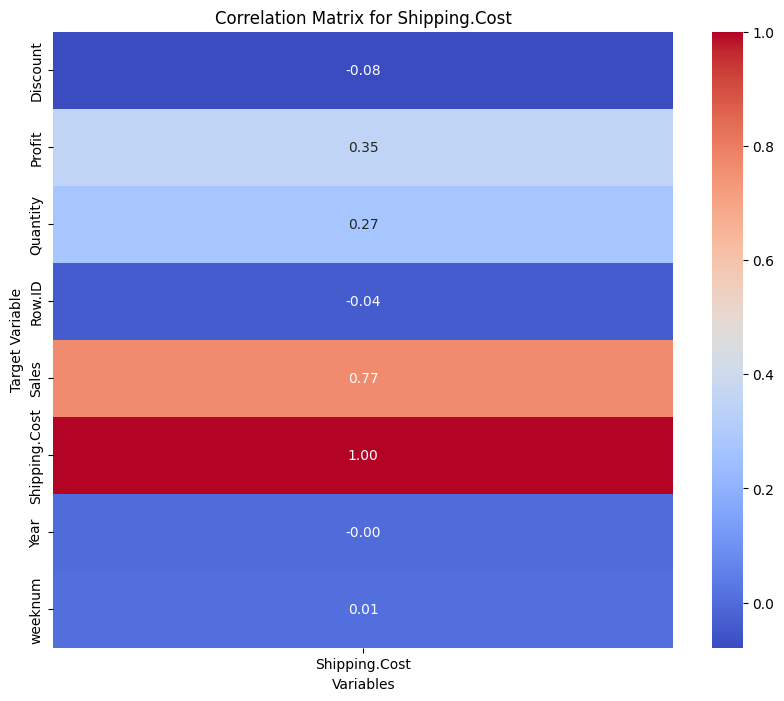

In [8]:
# Method 1: Correlation Analysis
target_variable = "Shipping.Cost"

# Calculate correlation matrix
correlation_matrix = data.corr()

# Filter correlation matrix for the target variable
target_correlation = correlation_matrix[target_variable]

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for {target_variable}")
plt.xlabel("Variables")
plt.ylabel("Target Variable")
plt.show()

<ipython-input-9-362650169e33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", fmt=".2f")


<Axes: >

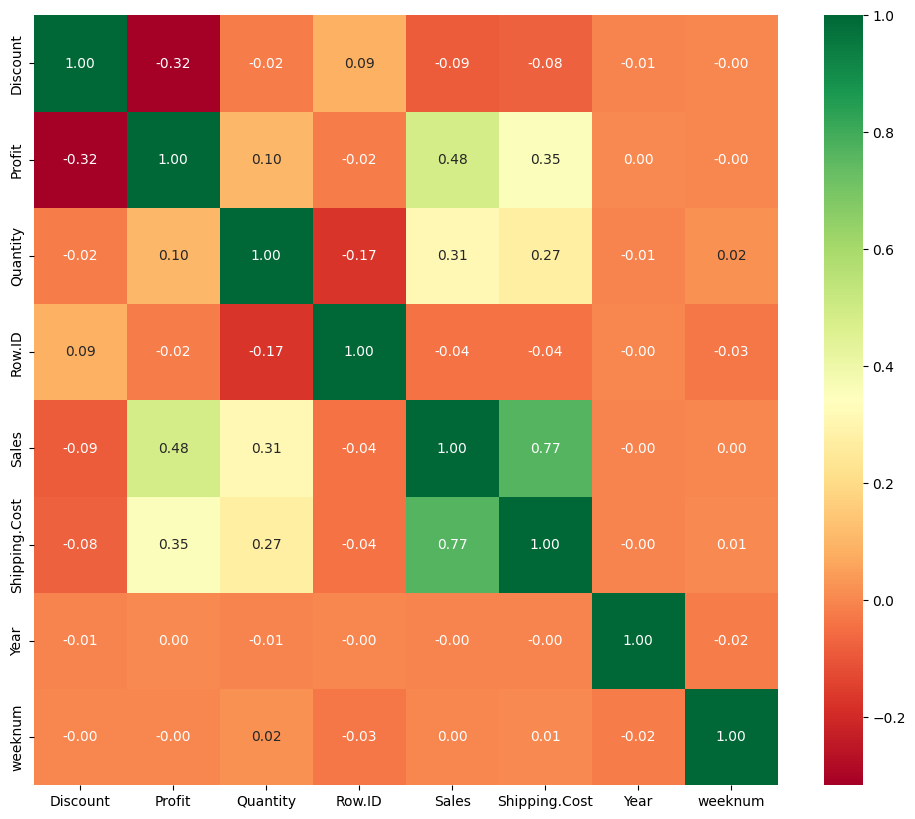

In [9]:
# heatmap of the same correlation matrix.
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", fmt=".2f")

***Method 2: Random Forest Classifier Feature Importance***

It provides a straightforward way to measure the importance of each feature in predicting the target variable. By analyzing the feature importances computed by Random Forest, we can identify the most influential independent variables that contribute significantly to the predictive performance of the model.

Text(0.5, 0, 'Feature Importance')

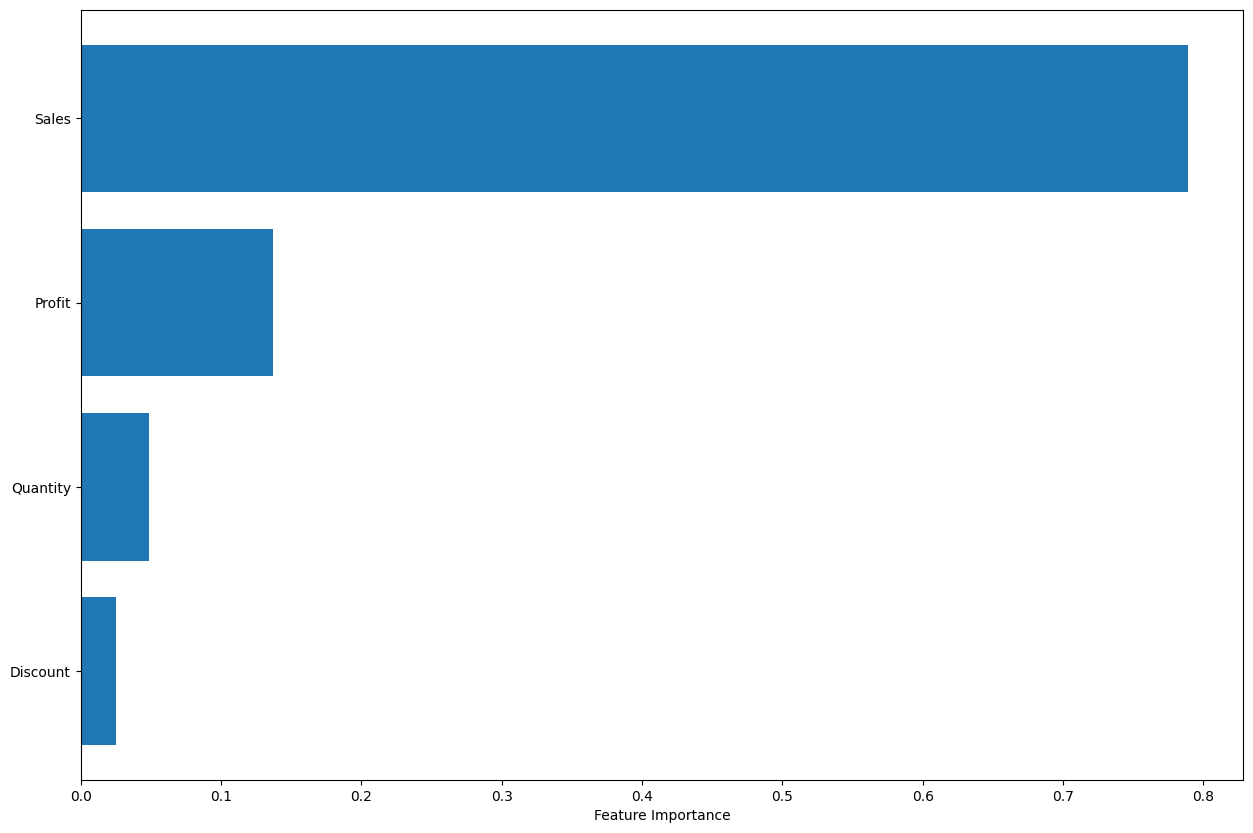

In [10]:
# Separate independent variables and target variable
X = data_norm.drop(columns = ['Shipping.Cost'])
y = data_norm['Shipping.Cost']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

plt.figure(figsize=(15,10))
sort = forest.feature_importances_.argsort()
plt.barh(data_norm.columns[sort], forest.feature_importances_[sort])
plt.xlabel("Feature Importance")

***Method 3: Recursive Feature Elimination***

It helps in finding independent variables by systematically evaluating the importance of each feature and ranking them based on their contribution to the model's performance. Features that have a greater impact on improving the model's performance are ranked higher, while less important features are ranked lower or eliminated altogether.

In [11]:
# Initialize a linear regression model
lr_model = LinearRegression()

# Initialize RFE
rfe = RFE(lr_model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Get ranking of features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values(ascending=True)
print(feature_ranking)

Discount    1
Quantity    2
Sales       3
Profit      4
dtype: int64


# Question 5: Which independent variables have missing data? How much?

Answer:

The above code stores the null/missing values in *missing_data* list. As there are no missing values the *missing_independent_variables* returns an empty list.

In [12]:
missing_data = data.drop(columns=['Shipping.Cost']).isnull().sum()

# Filter for independent variables with missing data
missing_independent_variables = missing_data[missing_data > 0]

print("Independent variables with missing data:")
print(missing_independent_variables)

Independent variables with missing data:
Series([], dtype: int64)


# Question 6: Do the training and test sets have the same data?

Answer:

*same_X_data*, *same_y_data* will result in the overlapping data of training and testing sets. As the resulting set is null, the training and test sets are different and do not have same data.

In [13]:
same_X_data = X_train.equals(X_test)
same_y_data = y_train.equals(y_test)


if same_X_data or same_y_data:
    print("Training and test sets have the same data")
else:
    print("Training and test sets have different data")

Training and test sets have different data


# Question 7: Are the predictor variables independent of all the other predictor variables?

Answer:

We determined the relationship of predictor variables is independent or not using correlation matrix. The above *independence* variable stores the boolean values and returns *True* if the predictor variables are independent of each other and returns *False* if they are dependent.

In [56]:
independence = (correlation_matrix.abs() < 0.1).all().all()

if independence:
    print("The predictor variables are independent of all the other predictor variables.")
else:
    print("The predictor variables are dependent of all the other predictor variables.")

The predictor variables are dependent of all the other predictor variables.


# Question 8: Which predictor variables are the most important?

Answer:

Random Forest Regression is used to determine the feature importance of predictor variables.

In [15]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print the most important predictor variables
print("Most important predictor variables:")
print(feature_importances.head())

Most important predictor variables:
Sales       0.790735
Profit      0.135572
Quantity    0.046318
Discount    0.027375
dtype: float64


# Question 9: Do the ranges of the predictor variables make sense?

Answer:

The ranges of each variable vary in terms of thousands to tens. The values are not scattered away from mean.

In [16]:
data[['Discount','Profit','Quantity','Sales']].describe()

,Discount,Profit,Quantity,Sales
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,246.498440
std,0.212280,174.340972,2.278766,487.567175
min,0.000000,-6599.978000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,31.000000
50%,0.000000,9.240000,3.000000,85.000000
75%,0.200000,36.810000,5.000000,251.000000
max,0.850000,8399.976000,14.000000,22638.000000


# Question 10: What are the distributions of the predictor variables?   

Answer:

The plotted distributions of predictor variables result in continuous normal distributions.

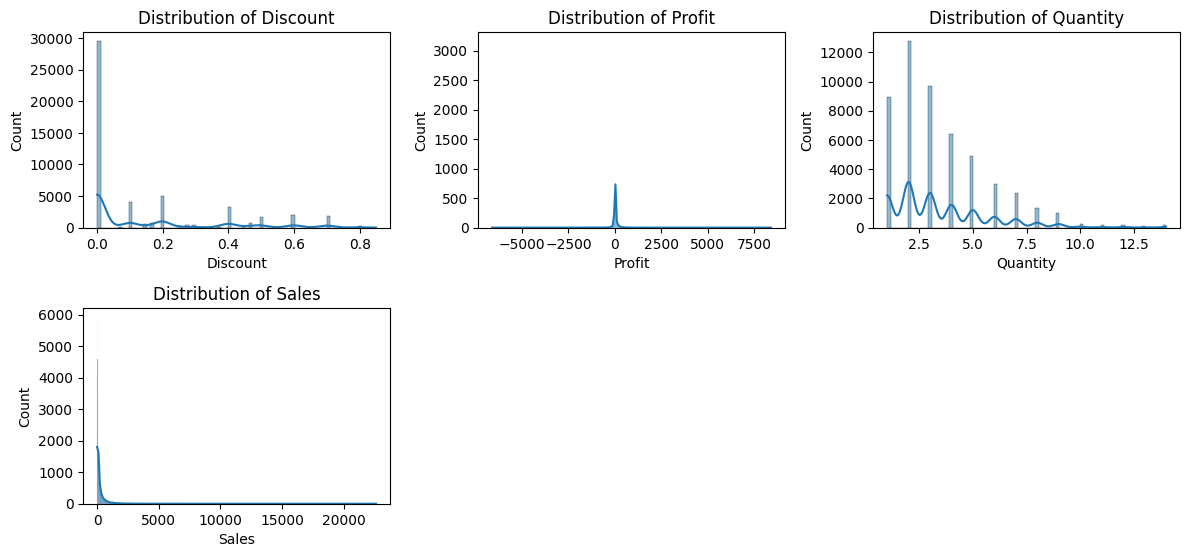

In [17]:
# Plot histograms for each predictor variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Question 11: Remove outliers and keep outliers (does it have an effect on the final predictive model)?

Answer:

Yes, Removing outliers has an effect on the final predictive model as the root mean squared error is reduced significantly.

In [18]:
# Select target variable and independent variables
target_variable = 'Shipping.Cost'
independent_variables = ['Discount', 'Profit', 'Sales', 'Quantity']

# Method 1: Train the model with original data (including outliers)
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Method 2: Remove outliers and train the model
# Define a function to remove outliers using modified Z-score method
def remove_outliers(df, cols, threshold=3):
    z_scores = stats.zscore(df[cols])
    df_outliers_removed = df[(z_scores < threshold).all(axis=1)]
    return df_outliers_removed

# Remove outliers from the independent variables
data_no_outliers = remove_outliers(data, independent_variables)

# Split the data into training and test sets
X_no_outliers = data_no_outliers[independent_variables]
y_no_outliers = data_no_outliers[target_variable]
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Train the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)

# Compare the performance of both models
print("Mean Squared Error (MSE) with original data (including outliers):", mse_original)
print("Mean Squared Error (MSE) after removing outliers:", mse_no_outliers)


Mean Squared Error (MSE) with original data (including outliers): 1597.266797428266
Mean Squared Error (MSE) after removing outliers: 533.5232923776013


# Question 12: Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [51]:
# Select numeric columns for imputation
numeric_columns = ['Discount', 'Profit', 'Sales', 'Quantity']

# Define function to remove random percentage of data
def remove_random_data(df, percentage):
    random_indices = np.random.choice(df.index, size=int(len(df) * percentage), replace=False)
    df_removed = df.copy()
    df_removed.loc[random_indices, numeric_columns] = np.nan
    return df_removed

# Define function for imputation using mean
def impute_mean(df):
    return df.fillna(df.mean())

# Define function for imputation using median
def impute_median(df):
    return df.fillna(df.median())

# Define function for imputation using most frequent
def impute_most_frequent(df):
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define function to evaluate imputation methods
def evaluate_imputation(df_original, df_imputed):
    residuals = df_original[numeric_columns] - df_imputed[numeric_columns]
    mean_residuals = residuals.mean()
    bias = mean_residuals.mean()
    variance = mean_residuals.var()
    return bias, variance

def calculate_percent_error(data_original, data_imputed):
    residuals = data_original - data_imputed
    epsilon = 0.0000001  # Add a small epsilon value to avoid division by zero
    percent_error = ((residuals.abs() + epsilon) / (data_original + epsilon)) * 100
    return percent_error.mean()

# Remove 1%, 5%, and 10% of data randomly and impute values using three different methods
percentages = [0.01, 0.05, 0.1]
imputation_methods = [impute_mean, impute_median, impute_most_frequent]

for percentage in percentages:
    for imputation_method in imputation_methods:
        # Remove random percentage of data
        data_removed = remove_random_data(data, percentage)

        # Impute missing values using the selected method
        data_imputed = imputation_method(data_removed)

        # Calculate percent error on residuals
        percent_error = calculate_percent_error(data[numeric_columns], data_imputed)
        print(f"Imputation Method: {imputation_method.__name__}, Removed Percentage: {percentage * 100}%")
        print(f"Percent Error: {percent_error.to_string()}%")

        # Evaluate imputation method
        bias, variance = evaluate_imputation(data[numeric_columns], data_imputed[numeric_columns])
        print(f"Randomly removed {percentage * 100}% of data and imputed using {imputation_method.__name__}:")
        print(f"Bias: {bias}")
        print(f"Variance: {variance}")
        print()


<ipython-input-51-ab6f1d678107>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.fillna(df.mean())


Imputation Method: impute_mean, Removed Percentage: 1.0%
Percent Error: Category                           NaN
City                               NaN
Country                            NaN
Customer.ID                        NaN
Customer.Name                      NaN
Discount                  8.451574e+05
Market                             NaN
Market2                            NaN
Order.Date                         NaN
Order.ID                           NaN
Order.Priority                     NaN
Product.ID                         NaN
Product.Name                       NaN
Profit                    2.787696e+06
Quantity                  8.118695e-01
Region                             NaN
Row.ID                             NaN
Sales                     6.738140e+00
Segment                            NaN
Ship.Date                          NaN
Ship.Mode                          NaN
Shipping.Cost                      NaN
Shipping.Cost_Category             NaN
State                          

<ipython-input-51-ab6f1d678107>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.fillna(df.median())


Imputation Method: impute_median, Removed Percentage: 1.0%
Percent Error: Category                           NaN
City                               NaN
Country                            NaN
Customer.ID                        NaN
Customer.Name                      NaN
Discount                  5.702093e+01
Market                             NaN
Market2                            NaN
Order.Date                         NaN
Order.ID                           NaN
Order.Priority                     NaN
Product.ID                         NaN
Product.Name                       NaN
Profit                    1.080913e+06
Quantity                  6.672098e-01
Region                             NaN
Row.ID                             NaN
Sales                     2.160948e+00
Segment                            NaN
Ship.Date                          NaN
Ship.Mode                          NaN
Shipping.Cost                      NaN
Shipping.Cost_Category             NaN
State                        

<ipython-input-51-ab6f1d678107>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.fillna(df.mean())


Imputation Method: impute_mean, Removed Percentage: 5.0%
Percent Error: Category                           NaN
City                               NaN
Country                            NaN
Customer.ID                        NaN
Customer.Name                      NaN
Discount                  4.035279e+06
Market                             NaN
Market2                            NaN
Order.Date                         NaN
Order.ID                           NaN
Order.Priority                     NaN
Product.ID                         NaN
Product.Name                       NaN
Profit                    1.616201e+07
Quantity                  3.811925e+00
Region                             NaN
Row.ID                             NaN
Sales                     3.054334e+01
Segment                            NaN
Ship.Date                          NaN
Ship.Mode                          NaN
Shipping.Cost                      NaN
Shipping.Cost_Category             NaN
State                          

<ipython-input-51-ab6f1d678107>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.fillna(df.median())


Imputation Method: impute_median, Removed Percentage: 5.0%
Percent Error: Category                           NaN
City                               NaN
Country                            NaN
Customer.ID                        NaN
Customer.Name                      NaN
Discount                  5.868207e+01
Market                             NaN
Market2                            NaN
Order.Date                         NaN
Order.ID                           NaN
Order.Priority                     NaN
Product.ID                         NaN
Product.Name                       NaN
Profit                    7.206071e+06
Quantity                  3.196099e+00
Region                             NaN
Row.ID                             NaN
Sales                     1.025610e+01
Segment                            NaN
Ship.Date                          NaN
Ship.Mode                          NaN
Shipping.Cost                      NaN
Shipping.Cost_Category             NaN
State                        

<ipython-input-51-ab6f1d678107>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.fillna(df.mean())


Imputation Method: impute_mean, Removed Percentage: 10.0%
Percent Error: Category                           NaN
City                               NaN
Country                            NaN
Customer.ID                        NaN
Customer.Name                      NaN
Discount                  8.218931e+06
Market                             NaN
Market2                            NaN
Order.Date                         NaN
Order.ID                           NaN
Order.Priority                     NaN
Product.ID                         NaN
Product.Name                       NaN
Profit                    3.910928e+07
Quantity                  7.914701e+00
Region                             NaN
Row.ID                             NaN
Sales                     6.747810e+01
Segment                            NaN
Ship.Date                          NaN
Ship.Mode                          NaN
Shipping.Cost                      NaN
Shipping.Cost_Category             NaN
State                         

<ipython-input-51-ab6f1d678107>:23: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return df.fillna(df.median())


Imputation Method: impute_median, Removed Percentage: 10.0%
Percent Error: Category                           NaN
City                               NaN
Country                            NaN
Customer.ID                        NaN
Customer.Name                      NaN
Discount                  6.093006e+01
Market                             NaN
Market2                            NaN
Order.Date                         NaN
Order.ID                           NaN
Order.Priority                     NaN
Product.ID                         NaN
Product.Name                       NaN
Profit                    1.360264e+07
Quantity                  6.379641e+00
Region                             NaN
Row.ID                             NaN
Sales                     2.190337e+01
Segment                            NaN
Ship.Date                          NaN
Ship.Mode                          NaN
Shipping.Cost                      NaN
Shipping.Cost_Category             NaN
State                       

# Accuracy and Confusion Matrix

Answer:

The Random Forest Classifier is used to train data and achieved accuracy for the model is 98.9%

In [48]:
# Load the dataset
url = "https://raw.githubusercontent.com/Deepthi-Nasika/DSEMT_Assignments/main/Data/dataset_superstore.csv"
data = pd.read_csv(url)

# Define the target variable and independent variables
target_variable = 'Shipping.Cost'
independent_variables = ['Discount', 'Profit', 'Sales', 'Quantity']

# Discretize the target variable into categories
data['Shipping.Cost_Category'] = pd.cut(data[target_variable], bins=3, labels=['Low', 'Medium', 'High'])

# Split the data into train and test sets
X = data[independent_variables]
y = data['Shipping.Cost_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9895691167868981
Confusion Matrix:
[[    0     9     3]
 [    2 10140    25]
 [    1    67    11]]
